In [1]:
import pandas as pd
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import time
import random
from IPython.display import IFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pickle
import os

In [2]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
audio_features_df = pd.read_csv(r"C:\Users\aican\2025-Ironhack\Unit10-2025-CW-25-26\Unit10-D1-2025-06-18\audio_features_dataset_curated.csv")
audio_features_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [4]:
audio_features_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,43000.000000,4.300000e+04,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,34.185953,2.308603e+05,0.575395,0.632784,5.346023,-7.915923,0.645512,0.071418,0.299402,0.118132,0.196259,0.482026,121.216687,3.910814
std,25.826649,9.285463e+04,0.166243,0.241942,3.559531,4.712412,0.478364,0.072019,0.322864,0.276817,0.172004,0.251098,29.360603,0.392699
min,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-43.043000,0.000000,0.000000,0.000001,0.000000,0.009860,0.000000,0.000000,0.000000
25%,1.000000,1.811060e+05,0.465000,0.475000,2.000000,-9.400000,0.000000,0.034300,0.022000,0.000000,0.096200,0.275000,97.937000,4.000000
50%,39.000000,2.168035e+05,0.587000,0.674000,6.000000,-6.749000,1.000000,0.045500,0.155000,0.000016,0.125000,0.472000,121.390500,4.000000
75%,54.000000,2.613592e+05,0.700000,0.832000,8.000000,-4.942000,1.000000,0.073700,0.546000,0.006942,0.242000,0.684000,139.950000,4.000000
max,100.000000,3.601693e+06,0.975000,1.000000,11.000000,1.821000,1.000000,0.924000,0.996000,1.000000,0.994000,0.995000,243.372000,5.000000


In [5]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   key               43000 non-null  int64  
 10  loudness          43000 non-null  float64
 11  mode              43000 non-null  int64  
 12  speechiness       43000 non-null  float64
 13  acousticness      43000 non-null  float64
 14  instrumentalness  43000 non-null  float64
 15  liveness          43000 non-null  float64
 16  valence           43000 non-null  float6

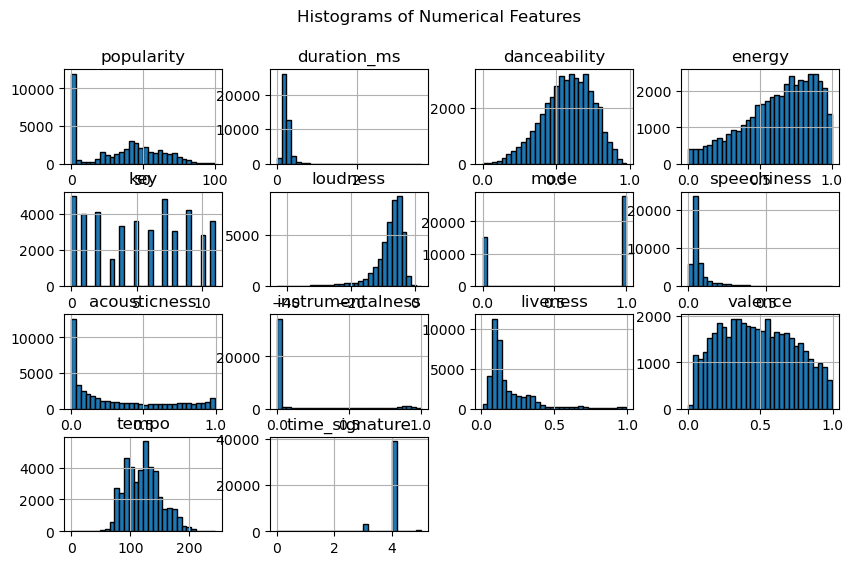

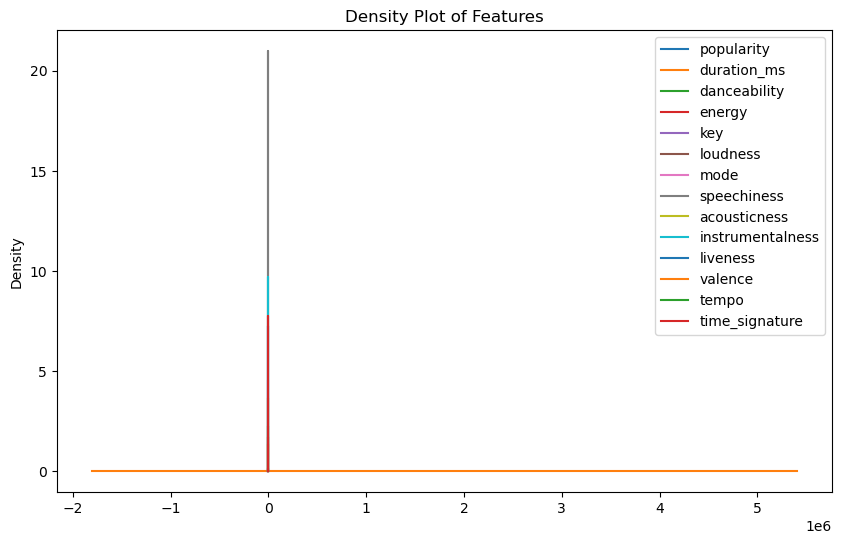

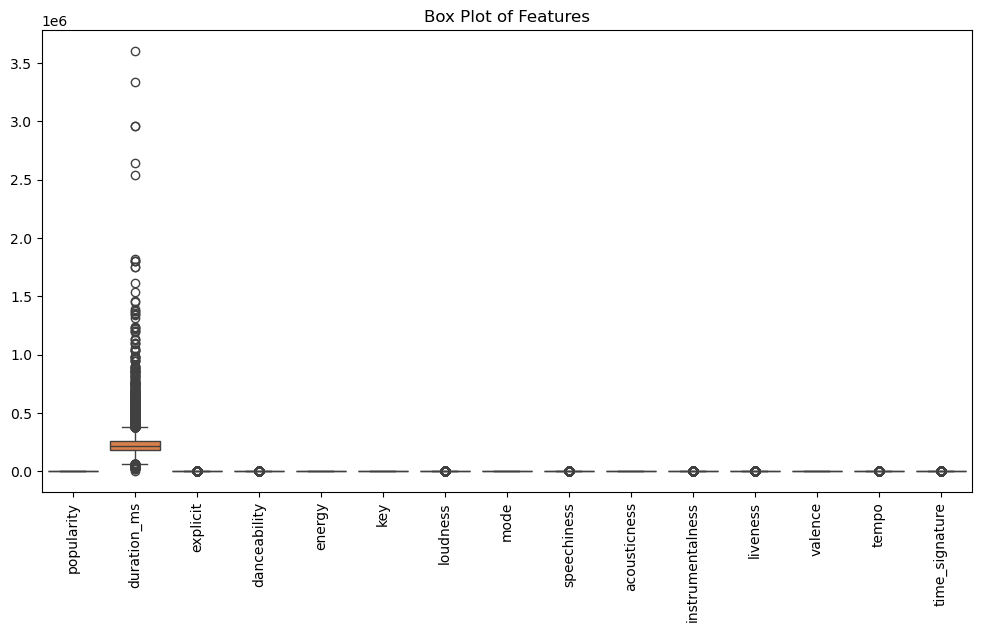

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
audio_features_df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

# KDE (Kernel Density Estimation) plot
audio_features_df.plot(kind="kde", figsize=(10, 6), title="Density Plot of Features")
plt.show()

# Box plot to check distributions and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=audio_features_df)
plt.title("Box Plot of Features")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

In [7]:
audio_features_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [8]:
rows_with_nulls = audio_features_df[audio_features_df.isnull().any(axis=1)]

# Display the rows
print(rows_with_nulls)

                     track_id artists album_name track_name  popularity  \
24900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
24900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
24900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  
24900  138.391               4  


In [9]:
# Identify rows with null values
rows_with_nulls = audio_features_df[audio_features_df.isnull().any(axis=1)]

# Extract track IDs (assuming the column name is 'track_id')
track_ids_with_nulls = rows_with_nulls["track_id"]

# Display the track IDs
print(track_ids_with_nulls)

24900    1kR4gIb7nGxHPI3D2ifs59
Name: track_id, dtype: object


In [10]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [11]:
def get_track_info(track_id):
    track = sp.track(track_id)
    artist = track["artists"][0]["name"]
    album = track["album"]["name"]
    track_name = track["name"]
    
    return artist, album, track_name

In [12]:
# Example usage
track_id = "1kR4gIb7nGxHPI3D2ifs59"
artist, album, track_name = get_track_info(track_id)

print(f"Artist: {artist}")
print(f"Album: {album}")
print(f"Track Name: {track_name}")

Artist: 
Album: 
Track Name: 


In [13]:
audio_features_df = audio_features_df[audio_features_df["track_id"] != "1kR4gIb7nGxHPI3D2ifs59"]

In [14]:
audio_features_df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [15]:
url = "https://raw.githubusercontent.com/aicanizares/gnod-project/refs/heads/main/billboard_data.csv"
billboard_df = pd.read_csv(url)

In [16]:
billboard_df.head(5)

,song,artist
0,Ordinary,Sabrina Carpenter
1,Sorry I'm Here For Someone Else,Alex Warren
2,I Got Better,Morgan Wallen Featuring Tate McRae
3,Amen,Morgan Wallen
4,Beautiful Things,Kendrick Lamar & SZA


In [17]:
def get_track_id(song, artist):
    try:
        query = f'track:{song} artist:{artist}'
        result = sp.search(q=query, type='track', limit=1)
        tracks = result.get('tracks', {}).get('items', [])
        time.sleep(0.5)  # Rate limiting: pause to avoid hitting API limits
        if tracks:
            return tracks[0]['id']
        else:
            return None
    except Exception as e:
        print(f"Error fetching track_id for '{song}' by '{artist}': {e}")
        return None

In [18]:
billboard_df['track_id'] = billboard_df.apply(
    lambda row: get_track_id(row['song'], row['artist']), axis=1
)

In [19]:
billboard_df

,song,artist,track_id
0,Ordinary,Sabrina Carpenter,None
1,Sorry I'm Here For Someone Else,Alex Warren,None
2,I Got Better,Morgan Wallen Featuring Tate McRae,None
3,Amen,Morgan Wallen,None
4,Beautiful Things,Kendrick Lamar & SZA,None
...,...,...,...
95,Timeless,Morgan Wallen,None
96,Love Somebody,Lil Wayne,None
97,TV Off,Sabrina Carpenter,None
98,Hard Fought Hallelujah,Myles Smith,None


In [20]:
# Here starts the attempt to get the track_id of billboard_df.

In [21]:
def get_track_id(song, artist):
    query = f"track:{song} artist:{artist}"
    result = sp.search(q=query, type='track', limit=1)
    tracks = result.get('tracks', {}).get('items', [])
    return tracks[0]['id'] if tracks else None

In [22]:
billboard_df['track_id'] = billboard_df.apply(
    lambda row: get_track_id(row['song'], row['artist']), axis=1
)

In [23]:
billboard_df

,song,artist,track_id
0,Ordinary,Sabrina Carpenter,None
1,Sorry I'm Here For Someone Else,Alex Warren,None
2,I Got Better,Morgan Wallen Featuring Tate McRae,None
3,Amen,Morgan Wallen,None
4,Beautiful Things,Kendrick Lamar & SZA,None
...,...,...,...
95,Timeless,Morgan Wallen,None
96,Love Somebody,Lil Wayne,None
97,TV Off,Sabrina Carpenter,None
98,Hard Fought Hallelujah,Myles Smith,None


In [24]:
billboard_df['track_id'].unique()

array([None, '6TUf119oQrkteMSKTE1SOf', '3UxdrAnFECXg7GJI6RnXHr',
       '04emojnbYkrRmv5qtJcgVP', '3QaPy1KgI7nu9FJEQUgn6h',
       '2XHzzp1j4IfTNp1FTn7YFg', '0wI5MvhcdTrVERaDOHiNnp'], dtype=object)

In [25]:
track_ids = [
    '6TUf119oQrkteMSKTE1SOf',
    '5SMot73RvQtwiUoITfI0sW',
    '04emojnbYkrRmv5qtJcgVP',
    '3QaPy1KgI7nu9FJEQUgn6h',
    '2XHzzp1j4IfTNp1FTn7YFg',
    '0wI5MvhcdTrVERaDOHiNnp'
]

In [26]:
for track_id in track_ids:
    track = sp.track(track_id)
    name = track['name']
    artist = track['artists'][0]['name']
    print(f"{name} by {artist}")



Skoal, Chevy, and Browning by Morgan Wallen
Birds of a Feather by Drake Sterling
What I Want (feat. Tate McRae) by Morgan Wallen
WILDFLOWER by Billie Eilish
Love Me by Lil Wayne
Welcome to Tha Carter by Lil Wayne


In [27]:
results = sp.search(q="daddy cool",limit=5,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=5&query=daddy%20cool&type=track&market=GB',
  'limit': 5,
  'next': 'https://api.spotify.com/v1/search?offset=5&limit=5&query=daddy%20cool&type=track&market=GB',
  'offset': 0,
  'previous': None,
  'total': 903,
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
       'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
       'id': '54R6Y0I7jGUCveDTtI21nb',
       'name': 'Boney M.',
       'type': 'artist',
       'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1KQUrny9y5zGpktF6hAGd4'},
     'href': 'https://api.spotify.com/v1/albums/1KQUrny9y5zGpktF6hAGd4',
     'id': '1KQUrny9y5zGpktF6hAGd4',
     'images': [{'height': 640,
       'width': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273dafd1cd6e9537ec8463ea691'},
   

In [28]:
track_id=results["tracks"]["items"][0]["id"]
track_id

'3WMbD1OyfKuwWDWMNbPQ4g'

In [29]:
# Here ends the attempt to get the track_id of billboard_df.

In [30]:
# First recommender with the user that enters an input. If they enter popular, I recommend them a random Billboard song. If not, working in progress.
# Then do the clustering for the songs, maybe 15.


In [31]:
# Group by cluester and ask for the mean of the feautres. That is the average tempo. That can help to name the clusters.

In [32]:
# Removing outliers is also a hint, because they can affect the clusters.
# Also remove duplicates.


In [33]:
# Homework of afternoon 06/19/2025.

# Add the track ID of the songs in the Billboard top 100. In another column.

# Create python programm to ask user for input. If popular, we play one of the billboard. if not then work in progress.
# Clean large dataset. # no duplicates
# Clustering.
# Scale
# Try some KMeans models.
# We must take into account typos (upper / lower case, fuzzy matching).



In [34]:
# Value counts can be used to detect how many songs are in each clusters. If the number of songs is very different from cluster to cluster, there might be wrong clustering.

In [35]:
# Recap of recommender:

# 0. Asking the user for an input and playing the song.
# 1. Look for the best k (k means). Look at the elbow method, silhouette score. Test the candidates out, e.g. 8. We can have a couple of candidates, number of clusters. Choose it. If we use the loop, have it pickled.
# 2. Add a new column "cluster" that stores the cluster of each song.
# 3. Start exploring the clusters (statistics of each cluster, listen to songs). Groupby for the averages of the features.
# 4. Label the clusters. Eg. high enegy, music for an autumn afternoon, relaxing. Include the labels in the question input.
# 5. Add their names to the Python program.
# 6. User chooses a genre, and they get recommended a song from that cluster. You play it for them.

In [36]:
def recommend_song(user_input, billboard_df, sp):
    if user_input == "popular":
        song = billboard_df["song"].sample().iloc[0]
        results = sp.search(q=song, limit=1)
        if results["tracks"]["items"]:
            song_id = results["tracks"]["items"][0]["id"]
            return play_song(song_id)
        else:
            return "Sorry, couldn't find the song on Spotify."
    else:
        return "Work in progress, we will recommend you a customized song for your taste very soon!"

In [37]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
user_input = input("Write your song preference to get a recommendation. You can choose between: popular (0), rock (1) or pop (2).")
display(recommend_song(user_input, billboard_df, sp))

In [ ]:
# In the code above, we are not passing the author, just the song. This may lead to songs that have the same title as ones in the Billboard 100, but are from different singers.
# Fix the mismatch between songs and artists in billboard_df and then pass the track_id into the function above.
# NOT DONE

In [ ]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1],alpha=0.5,)
plt.show()

In [ ]:
numerical_audio_features_df = audio_features_df.select_dtypes(include="number")

In [ ]:
unique_popularity = numerical_audio_features_df["popularity"].drop_duplicates().sort_values(ascending=False)
print(unique_popularity)

In [ ]:
numerical_audio_features_df

In [ ]:
inertias = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)

In [ ]:
# Number of chosen clusters according to the elbow method:
# The "elbow" (where the rate of decrease in inertia starts to flatten) is most prominent around 7 clusters.

In [ ]:
cluster_range = range(2, 21)
silhouette_scores = []

os.makedirs("pickles", exist_ok=True)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(X_scaled)
    #pickling
    filename = "pickles/kmeans_" + str(n_clusters) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
        
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [ ]:
# Silhouette score: Among values k ≥ 5, the local maximum of the silhouette score is at k = 5, and the second maximum is 7.
# Since the conclusion of the elbow method was also 7 clusters, we will use 7 clusters.

In [ ]:
minmax = MinMaxScaler()

In [ ]:
minmax.fit(numerical_audio_features_df)
X_scaled = minmax.transform(numerical_audio_features_df)

In [ ]:
# Create K-Means Model
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_scaled)

In [ ]:
kmeans.labels_

In [ ]:
kmeans.predict(X_scaled)

In [ ]:
audio_features_df["cluster"] = kmeans.labels_

In [ ]:
audio_features_df

In [ ]:
audio_features_df.columns

In [ ]:
numerical_audio_features_df.sample()

In [ ]:
input_cluster = int(input("please enter an audio features cluster"))

In [ ]:
filtered_audio_features_cluster = audio_features_df.loc[audio_features_df["cluster"]==input_cluster]

In [ ]:
filtered_audio_features_cluster

In [ ]:
unique_clusters = filtered_audio_features_cluster["cluster"].unique()

In [ ]:
unique_clusters

In [ ]:
# User input for cluster selection
# input_cluster = int(input("Please enter an audio features cluster (0, 1, or 2): "))
#    display(recommend_song(user_input, audio_features_df, sp))

# Filter the DataFrame based on the selected cluster
# filtered_audio_features_cluster # Function to play song
# def play_song(track_id):
#     sp.start_playback(uris=[f"spotify:track:{track_id}"])

# Example usage
# track_id = "42UBPzRMh5yyz0EDPr6fr1"  # Replace with actual track ID
# play_song(track_id)

# ter = audio_features_df.loc[audio_features_df["cluster"] == input_cluster]

# Select a random row and display its track ID
# random_track_id = filtered_audio_features_cluster.sample(n=1)["track_id"].values[0]
# print("Random Track ID from selected Cluster", input_cluster, ":", random_track_id)

In [ ]:
# Function to play song
def play_song(track_id):
    sp.start_playback(uris=[f"spotify:track:{track_id}"])

In [ ]:
# track_id = "42UBPzRMh5yyz0EDPr6fr1"  # Replace with actual track ID
# play_song(track_id)